<a href="https://colab.research.google.com/github/svrmnnk/ml_and_ds/blob/main/landsearch_analysis_28062022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is a notebook for 
1. parsing the landsearch.com website and trying to collect the data on industrial land prices for all states/metropolitan areas. the target webpage is located at [https://www.landsearch.com/industrial/united-states/p1]

[update 23 june 2022]
the script for parsing was finally written in pycharm ide. the code for parsing the site is available in the file here: https://drive.google.com/file/d/1k1GK2RiYG3i76-UPc8Rj5BNwgndfyq94/view?usp=sharing.

i've managed to parse as much as 150 pages and extract of them 5209 rows of data that we will know visualise and try to make some conclusions.

2. analyzing the dataset formed, visualising distributions and making some conclusions

In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# uploading the dataset parsed into a pandas dataframe object 

lands = pd.read_csv("/content/drive/MyDrive/☀️ solar/datasets, scripts, notebooks/industrial_land_prices_dataset_23062022.csv", 
                    sep = ",", 
                    names = ["county", "price", "square, ac", "location"],
                    encoding = "utf-8")
lands.head(5)

,county,price,"square, ac",location
0,Hancock County,"$89,900",1 ac,"Hancock, ME 04634"
1,Hancock County,"$995,000",2.32 ac,"Ellsworth, ME 04605"
2,Penobscot County,"$85,000",0.93 ac,"Bangor, ME 04401"
3,Penobscot County,"$888,000",11 ac,"Hermon, ME 04401"
4,Knox County,"$599,000",21.6 ac,"Warren, ME 04864"


before analysing the dataset we need to prepare the data, clean it, check for double values, delete some unwanted characters and align the type of values in columns so that number be integers and we could use them for calculations


In [3]:
# first we can get rid of dollar sign and coma in "price" column and transform it to integers for further calculations

lands["price"] = lands["price"].str.replace("$", '').str.replace(",", '')
lands["price"] = lands["price"].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

In [4]:
# converting to int failed because there are some strange price formats, let's see what exactly are those
# will find some patterns using regex

pattern01 = "/"
pattern01_count = lands["price"].str.contains(pattern01).sum()
print(f" there are {pattern01_count} cells containing a slash in price column")

pattern02 = "mo"
pattern02_count = lands["price"].str.contains(pattern02).sum()
print(f" there are {pattern02_count} cells containing 'mo'in price column")

 there are 31 cells containing a slash in price column
 there are 31 cells containing 'mo'in price column


In [5]:
show_mo = lands[lands["price"].str.contains("/")]
show_mo.head(10)

,county,price,"square, ac",location
107,Suffolk County,3500/mo,0.3 ac,"Center Moriches, NY 11934"
194,Atlantic County,2500/mo,0.54 ac,"Atlantic City, NJ 08401"
262,Cumberland County,--/mo,4.79 ac,"Vineland, NJ 08360"
274,Monroe County,8000/mo,3 ac,"East Stroudsburg, PA 18302"
360,Lehigh County,4500/mo,1.5 ac,"South Whitehall Township, PA 18104"
374,Montgomery County,2600/mo,0.46 ac,"Pottstown, PA 19464"
836,Cumberland County,1500/mo,0.98 ac,"Fayetteville, NC 28312"
849,Cumberland County,1200/mo,2 ac,"Fayetteville, NC 28306"
871,Horry County,35000/mo,2 ac,"Conway, SC 29526"
1043,Forsyth County,--/mo,0.29 ac,"Winston-Salem, NC 27105"


In [6]:
# dropping those 31 cells with wrong price format (probably listings for rent - not relevant for us)

show_mo.drop(show_mo.index[show_mo['price'].str.contains("/")])
show_mo.head(10)

,county,price,"square, ac",location
107,Suffolk County,3500/mo,0.3 ac,"Center Moriches, NY 11934"
194,Atlantic County,2500/mo,0.54 ac,"Atlantic City, NJ 08401"
262,Cumberland County,--/mo,4.79 ac,"Vineland, NJ 08360"
274,Monroe County,8000/mo,3 ac,"East Stroudsburg, PA 18302"
360,Lehigh County,4500/mo,1.5 ac,"South Whitehall Township, PA 18104"
374,Montgomery County,2600/mo,0.46 ac,"Pottstown, PA 19464"
836,Cumberland County,1500/mo,0.98 ac,"Fayetteville, NC 28312"
849,Cumberland County,1200/mo,2 ac,"Fayetteville, NC 28306"
871,Horry County,35000/mo,2 ac,"Conway, SC 29526"
1043,Forsyth County,--/mo,0.29 ac,"Winston-Salem, NC 27105"


In [7]:
# now dropping those rows from our main dataframe

lands = lands.drop(lands.index[lands["price"].str.contains("/")], inplace = False)
lands.head(10)

,county,price,"square, ac",location
0,Hancock County,89900,1 ac,"Hancock, ME 04634"
1,Hancock County,995000,2.32 ac,"Ellsworth, ME 04605"
2,Penobscot County,85000,0.93 ac,"Bangor, ME 04401"
3,Penobscot County,888000,11 ac,"Hermon, ME 04401"
4,Knox County,599000,21.6 ac,"Warren, ME 04864"
5,Lincoln County,225000,3.72 ac,"Waldoboro, ME 04572"
6,Piscataquis County,225000,84.5 ac,"Monson, ME 04464"
7,Lincoln County,100000,6.5 ac,"Newcastle, ME 04553"
8,Kennebec County,749000,8.2 ac,"Benton, ME 04901"
9,Lincoln County,75000,4.48 ac,"Newcastle, ME 04553"


In [8]:
pattern01 = "/"
pattern01_count = lands["price"].str.contains(pattern01).sum()
print(f" there are {pattern01_count} cells containing a slash in price column")

 there are 0 cells containing a slash in price column


In [9]:
# now we can try to convert price to int again

lands["price"] = lands["price"].astype('int')

ValueError: ignored

In [10]:
# another misformat issue found, doing the same with "min as we've done with "mo"

min_count = lands["price"].str.contains("min").sum()
print(f" there are {min_count} cells containing a 'min' in price column")


show_min = lands[lands["price"].str.contains("min")]
show_min.head(10)

 there are 1 cells containing a 'min' in price column


,county,price,"square, ac",location
522,Anne Arundel County,200000 min,0.58 ac,"Glen Burnie, MD 21061"


okay, as this is minimum, probably will just get rid of "min" string, and then will check other cells in that column for spaces (potential for other wrong format strings)

In [11]:
lands["price"] = lands["price"].str.replace("min", '')

min_count = lands["price"].str.contains("min").sum()
print(f" there are {min_count} cells containing a 'min' in price column")


 there are 0 cells containing a 'min' in price column


In [12]:
spaces_count = lands["price"].str.contains(" ").sum()
print(f" there are {spaces_count} cells containing a space in price column")

show_space = lands[lands["price"].str.contains(" ")]
show_space.head(10)

 there are 3 cells containing a space in price column


,county,price,"square, ac",location
522,Anne Arundel County,200000,0.58 ac,"Glen Burnie, MD 21061"
3940,Tarrant County,-- lease,3 ac,"Fort Worth, TX 76135"
4431,San Juan County,-- lease,2.5 ac,"Farmington, NM 87401"


In [13]:
# again deleting the space and dropping two rows with wrong values in "price" column

lands["price"] = lands['price'].str.replace(" ", "")
spaces_count_01 = lands["price"].str.contains(" ").sum()
print(f" there are {spaces_count_01} cells containing a space in price column")

lands = lands.drop(lands.index[lands["price"].str.contains("--")], inplace = False)

lands["price"] = lands["price"].astype(int)

 there are 0 cells containing a space in price column


In [14]:
lands["county"].value_counts()

Mohave County       181
Yavapai County      181
Monroe County        85
Jefferson County     67
Wayne County         59
                   ... 
Sac County            1
Red River County      1
Galveston County      1
Camp County           1
Baker County          1
Name: county, Length: 897, dtype: int64

In [15]:
# we see that probably there is a considerable number of counties with as much as 1 listing, so they are probably no need for us. let'see how much of those do we got

s = lands.county.value_counts()

print(s[s == 1].index)

lonely_counties = lands[lands.county.isin(s[s==1].index)]
lonely_counties

Index(['Sagadahoc County', 'Rabun County', 'Swisher County',
       'Val Verde County', 'Seward County', 'Hale County', 'Preston County',
       'Dixie County', 'Morton County', 'Sampson County',
       ...
       'Hubbard County', 'Muskogee County', 'Gordon County',
       'Whitfield County', 'Yates County', 'Sac County', 'Red River County',
       'Galveston County', 'Camp County', 'Baker County'],
      dtype='object', length=275)


,county,price,"square, ac",location
13,Sagadahoc County,40000,0.22 ac,"Bath, ME 04530"
42,Norfolk County,5000000,1.9 ac,"Quincy, MA 02169"
52,Newport County,225000,5 ac,"Tiverton, RI 02878"
64,Coos County,350000,14 ac,"Lancaster, NH 03584"
77,Caledonia County,155000,4 ac,"Lyndon, VT 05851"
...,...,...,...,...
4754,Minidoka County,2638400,77.6 ac,"Heyburn, ID 83336"
4925,Blaine County,3775000,20 ac,"Bellevue, ID 83313"
4987,Sanders County,1195000,2.5 ac,"Plains, MT 59859"
5068,Malheur County,3000000,115 ac,"Ontario, OR 97914"


we will probably drop those 275 lonely counties (they won't let us make simple and clear visualisations), but before that we'll make sure they are not in one of those states where there are not much counties. however, on average states have 62 counties within and the leader is texas with 254 counties. 

for example:

*   delaware has only 3 counties
*   hawaii and rhode island only have 5 (we are not likely to build there, but still)
* connecticut has 8 etc

---



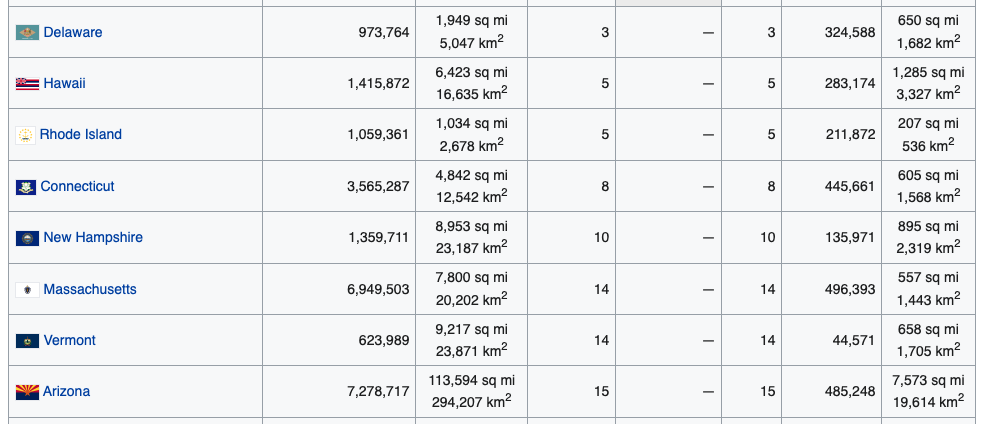

to do that we'll work with the column called "location". it has three values inside: the name of the town/city, the abbreviation of the state and the post index. the state is separated from the city by comma and the post code is separated from the state by a space. 

**so the plan is**
* separate all three values from one column to separate columns
* map state abbreviations to their full names [dictionary needed]
* leave post codes as they are for now, probably will use them later
* work with states as we need: group by, visualise and more

In [16]:
# analysing how much commas and spaces do we got in the "location" column

lands['comma_count'] = lands.location.str.count(',')
lands['spaces_count'] = lands.location.str.count(' ')
print(lands.dtypes)
lands.describe()

county          object
price            int64
square, ac      object
location        object
comma_count      int64
spaces_count     int64
dtype: object


,price,comma_count,spaces_count
count,5.149000e+03,5149.0,5149.000000
mean,9.831727e+05,1.0,2.242571
std,2.923050e+06,0.0,0.460572
min,2.000000e+03,1.0,2.000000
25%,1.950000e+05,1.0,2.000000
50%,4.390000e+05,1.0,2.000000
75%,9.900000e+05,1.0,2.000000
max,1.626270e+08,1.0,5.000000


okay, we see that each cell in the column "location" has exactly one comma, while with spaces the situation is not like that, there are cells with up to 5 spaces, so let's have a look on those and identify them. maybe there are not much of those? 

In [17]:
spacy_locations_5 = lands[lands.location.str.count(" ")==5]
spacy_locations_4 = lands[lands.location.str.count(' ') == 4]
spacy_locations_3 = lands[lands.location.str.count(' ') == 3]

# uncomment any of three following lines to see examples of cells with too much spaces
# spacy_locations_5.head(2)
# spacy_locations_4.head(2)
# spacy_locations_3.head(2)

so we have three types of cells with >2 number of spaces:
* cell with three spaces (the case of two-word cities such as 'south yarmouth' in ma or 'baker city' in oregon. 
* cell with four spaces (the case of three-word cities such as 'desert hot springs' in california)
* cell with five spaces (just two cases of four-word cities - 'cape may court house' in new jersey and 'van buren charter township' in michigan.

that leads us to a conclusion that we need some way to change some spaces into hyphens (those that are "inside" city name) and other replace for en empty symbol for the need of out str.split()

In [18]:
# splitting state from city and then merging them again

lands[['city', 'state']] = lands['location'].str.split(',', expand = True)
lands['city'] = lands['city'].str.replace(" ", "_")
lands['location_new'] = lands['city']+''+lands['state']
lands.head(20)

,county,price,"square, ac",location,comma_count,spaces_count,city,state,location_new
0,Hancock County,89900,1 ac,"Hancock, ME 04634",1,2,Hancock,ME 04634,Hancock ME 04634
1,Hancock County,995000,2.32 ac,"Ellsworth, ME 04605",1,2,Ellsworth,ME 04605,Ellsworth ME 04605
2,Penobscot County,85000,0.93 ac,"Bangor, ME 04401",1,2,Bangor,ME 04401,Bangor ME 04401
3,Penobscot County,888000,11 ac,"Hermon, ME 04401",1,2,Hermon,ME 04401,Hermon ME 04401
4,Knox County,599000,21.6 ac,"Warren, ME 04864",1,2,Warren,ME 04864,Warren ME 04864
5,Lincoln County,225000,3.72 ac,"Waldoboro, ME 04572",1,2,Waldoboro,ME 04572,Waldoboro ME 04572
6,Piscataquis County,225000,84.5 ac,"Monson, ME 04464",1,2,Monson,ME 04464,Monson ME 04464
7,Lincoln County,100000,6.5 ac,"Newcastle, ME 04553",1,2,Newcastle,ME 04553,Newcastle ME 04553
8,Kennebec County,749000,8.2 ac,"Benton, ME 04901",1,2,Benton,ME 04901,Benton ME 04901
9,Lincoln County,75000,4.48 ac,"Newcastle, ME 04553",1,2,Newcastle,ME 04553,Newcastle ME 04553


so doing that we managed to replace space symbols within city names with underscores, now we can split the data into three different columns.

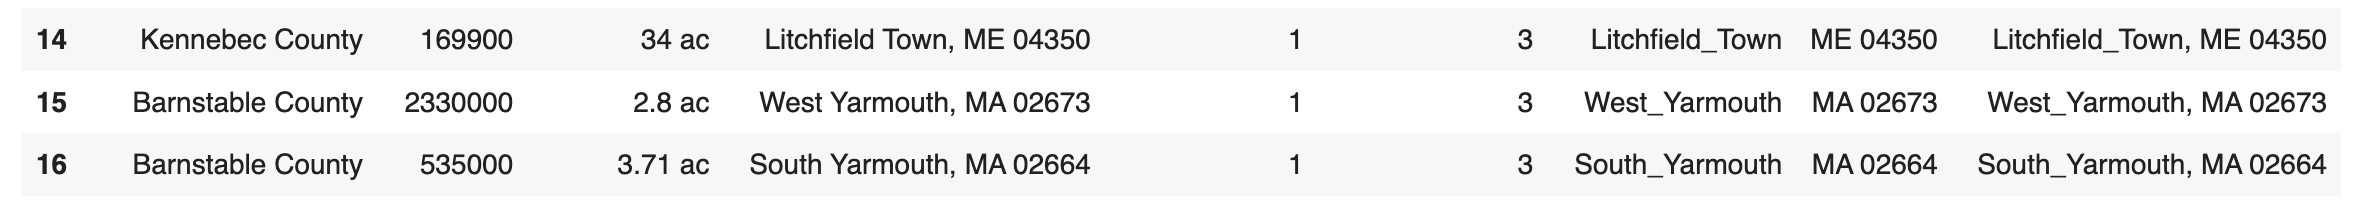

In [19]:
lands[['final_city', 'final_state', 'postcode']] = lands['location_new'].str.split(' ', expand = True)
lands

,county,price,"square, ac",location,comma_count,spaces_count,city,state,location_new,final_city,final_state,postcode
0,Hancock County,89900,1 ac,"Hancock, ME 04634",1,2,Hancock,ME 04634,Hancock ME 04634,Hancock,ME,04634
1,Hancock County,995000,2.32 ac,"Ellsworth, ME 04605",1,2,Ellsworth,ME 04605,Ellsworth ME 04605,Ellsworth,ME,04605
2,Penobscot County,85000,0.93 ac,"Bangor, ME 04401",1,2,Bangor,ME 04401,Bangor ME 04401,Bangor,ME,04401
3,Penobscot County,888000,11 ac,"Hermon, ME 04401",1,2,Hermon,ME 04401,Hermon ME 04401,Hermon,ME,04401
4,Knox County,599000,21.6 ac,"Warren, ME 04864",1,2,Warren,ME 04864,Warren ME 04864,Warren,ME,04864
...,...,...,...,...,...,...,...,...,...,...,...,...
5204,Los Angeles County,435999,2.14 ac,"Palmdale, CA 93550",1,2,Palmdale,CA 93550,Palmdale CA 93550,Palmdale,CA,93550
5205,Los Angeles County,445999,1.5 ac,"Palmdale, CA 93550",1,2,Palmdale,CA 93550,Palmdale CA 93550,Palmdale,CA,93550
5206,Kern County,9999,2.5 ac,"Mojave, CA 93501",1,2,Mojave,CA 93501,Mojave CA 93501,Mojave,CA,93501
5207,Los Angeles County,429999,1.27 ac,"Palmdale, CA 93550",1,2,Palmdale,CA 93550,Palmdale CA 93550,Palmdale,CA,93550


now we have it, so we can drop unnecessary columns (location, comma_count, spaces_count, city, state) and rename others 

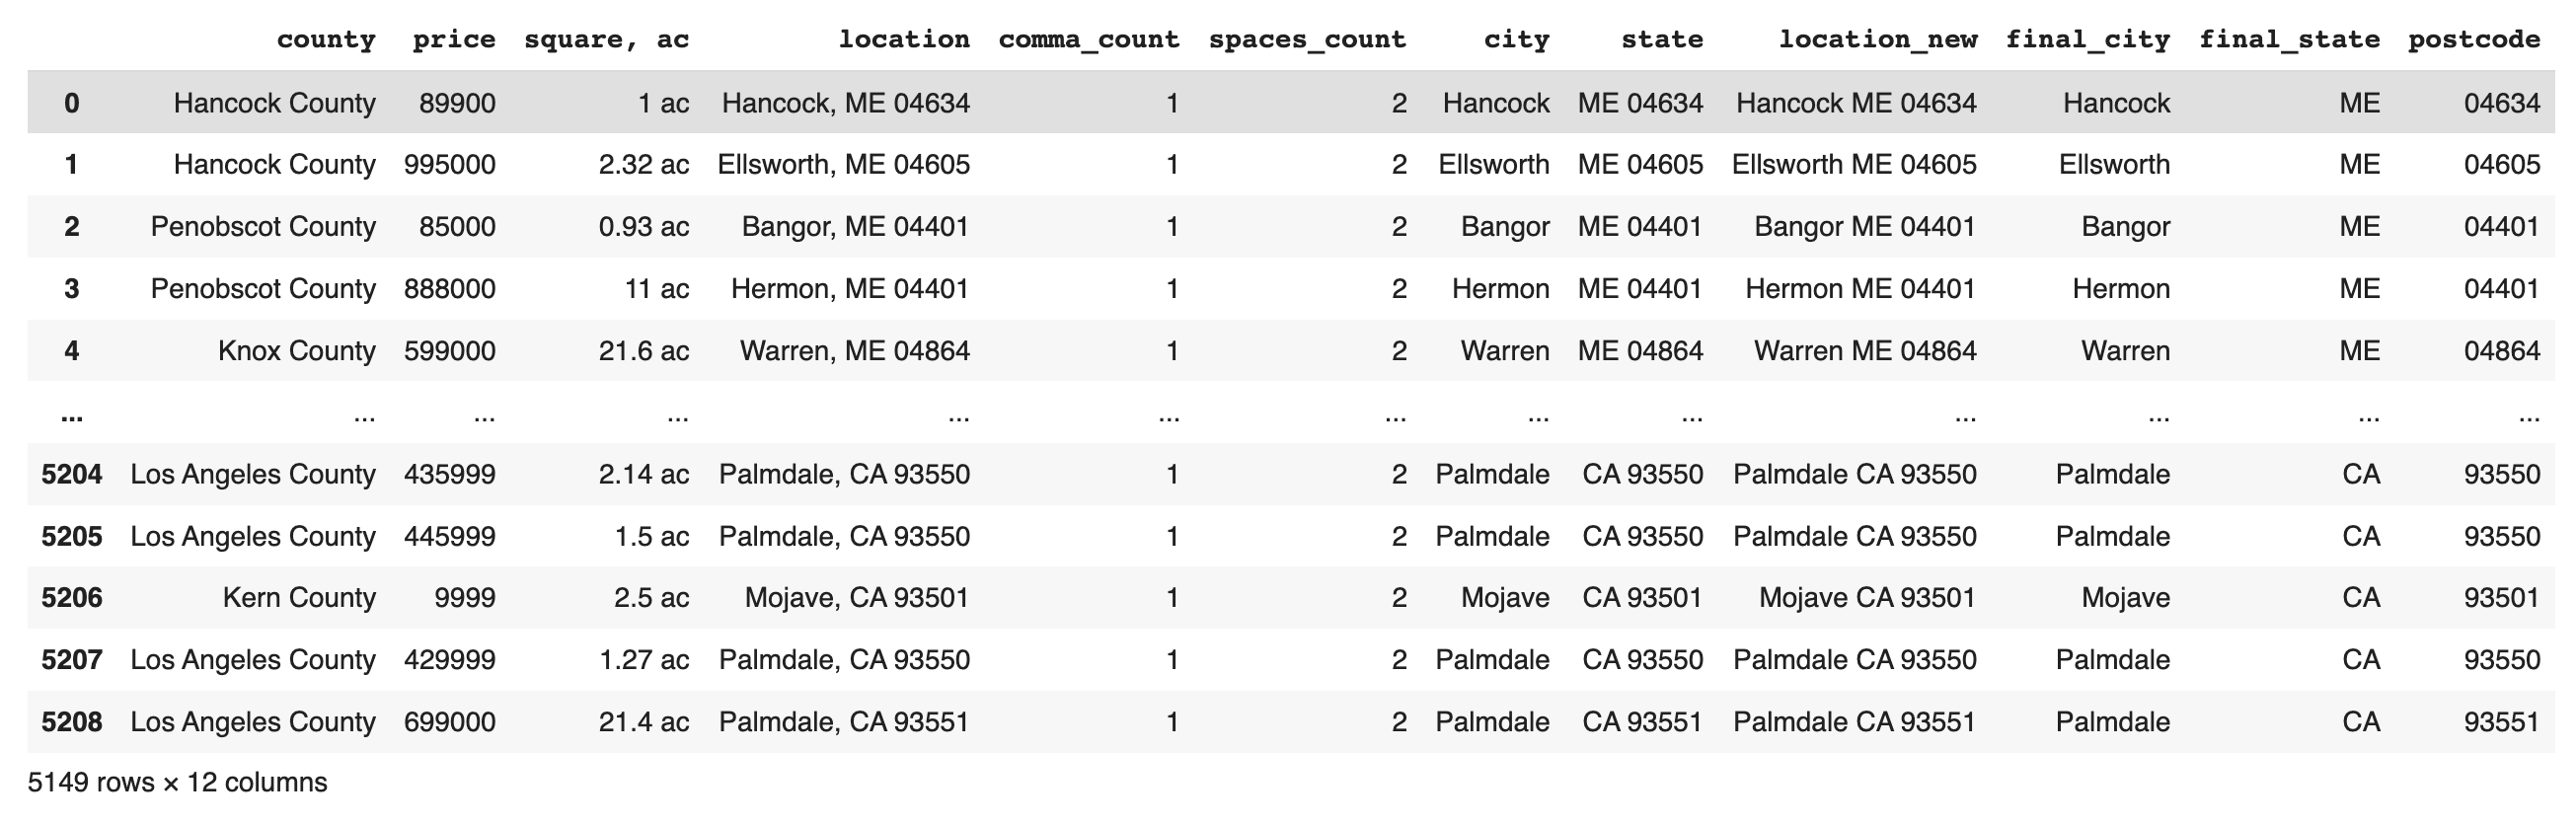

In [20]:
# dropping unnecessary columns
lands = lands.drop(['location', 'comma_count', 'spaces_count', 'city', 'state'], axis = 1)
lands.head(5)

,county,price,"square, ac",location_new,final_city,final_state,postcode
0,Hancock County,89900,1 ac,Hancock ME 04634,Hancock,ME,04634
1,Hancock County,995000,2.32 ac,Ellsworth ME 04605,Ellsworth,ME,04605
2,Penobscot County,85000,0.93 ac,Bangor ME 04401,Bangor,ME,04401
3,Penobscot County,888000,11 ac,Hermon ME 04401,Hermon,ME,04401
4,Knox County,599000,21.6 ac,Warren ME 04864,Warren,ME,04864


In [21]:
# renaming correct columns
lands.columns = ['county', 'price', 'square, ac', 'location', 'city', 'state', 'postcode']
lands

,county,price,"square, ac",location,city,state,postcode
0,Hancock County,89900,1 ac,Hancock ME 04634,Hancock,ME,04634
1,Hancock County,995000,2.32 ac,Ellsworth ME 04605,Ellsworth,ME,04605
2,Penobscot County,85000,0.93 ac,Bangor ME 04401,Bangor,ME,04401
3,Penobscot County,888000,11 ac,Hermon ME 04401,Hermon,ME,04401
4,Knox County,599000,21.6 ac,Warren ME 04864,Warren,ME,04864
...,...,...,...,...,...,...,...
5204,Los Angeles County,435999,2.14 ac,Palmdale CA 93550,Palmdale,CA,93550
5205,Los Angeles County,445999,1.5 ac,Palmdale CA 93550,Palmdale,CA,93550
5206,Kern County,9999,2.5 ac,Mojave CA 93501,Mojave,CA,93501
5207,Los Angeles County,429999,1.27 ac,Palmdale CA 93550,Palmdale,CA,93550


In [22]:
# now let's turn state abbreviations into full names for easier understanding of future plots
# for that we'll use the dictionary and we'll map items from the dictionary for the whole column

us_state_abbrev = {
            'AL': 'Alabama',
            'AK': 'Alaska',
            'AZ': 'Arizona',
            'AR': 'Arkansas',
            'CA': 'California',
            'CO': 'Colorado',
            'CT': 'Connecticut',
            'DE': 'Delaware',
            'FL': 'Florida',
            'GA': 'Georgia',
            'HI': 'Hawaii',
            'ID': 'Idaho',
            'IL': 'Illinois',
            'IN': 'Indiana',
            'IA': 'Iowa',
            'KS': 'Kansas',
            'KY': 'Kentucky',
            'LA': 'Louisiana',
            'ME': 'Maine',
            'MD': 'Maryland',
            'MA': 'Massachusetts',
            'MI': 'Michigan',
            'MN': 'Minnesota',
            'MS': 'Mississippi',
            'MO': 'Missouri',
            'MT': 'Montana',
            'NE': 'Nebraska',
            'NV': 'Nevada',
            'NH': 'New Hampshire',
            'NJ': 'New Jersey',
            'NM': 'New Mexico',
            'NY': 'New York',
            'NC': 'North Carolina',
            'ND': 'North Dakota',
            'OH': 'Ohio',
            'OK': 'Oklahoma',
            'OR': 'Oregon',
            'PA': 'Pennsylvania',
            'RI': 'Rhode Island',
            'SC': 'South Carolina',
            'SD': 'South Dakota',
            'TN': 'Tennessee',
            'TX': 'Texas',
            'UT': 'Utah',
            'VT': 'Vermont',
            'VA': 'Virginia',
            'WA': 'Washington',
            'WV': 'West_Virginia',
            'WI': 'Wisconsin',
            'WY': 'Wyoming',
            'DC': 'District_of_Columbia',
            'MP': 'Northern_Mariana_Islands',
            'PW': 'Palau',
            'PR': 'Puerto_Rico',
            'VI': 'Virgin_Islands',
            'AA': 'Armed Forces Americas (Except Canada)',
            'AE': 'Armed Forces Africa/Canada/Europe/Middle East',
            'AP': 'Armed Forces Pacific'
        }

lands = lands.replace({'state': us_state_abbrev})
lands

,county,price,"square, ac",location,city,state,postcode
0,Hancock County,89900,1 ac,Hancock ME 04634,Hancock,Maine,04634
1,Hancock County,995000,2.32 ac,Ellsworth ME 04605,Ellsworth,Maine,04605
2,Penobscot County,85000,0.93 ac,Bangor ME 04401,Bangor,Maine,04401
3,Penobscot County,888000,11 ac,Hermon ME 04401,Hermon,Maine,04401
4,Knox County,599000,21.6 ac,Warren ME 04864,Warren,Maine,04864
...,...,...,...,...,...,...,...
5204,Los Angeles County,435999,2.14 ac,Palmdale CA 93550,Palmdale,California,93550
5205,Los Angeles County,445999,1.5 ac,Palmdale CA 93550,Palmdale,California,93550
5206,Kern County,9999,2.5 ac,Mojave CA 93501,Mojave,California,93501
5207,Los Angeles County,429999,1.27 ac,Palmdale CA 93550,Palmdale,California,93550


In [23]:
# now we can count the number of states in the dataset (should be less than 52)

unique_states = lands['state'].unique()
print(f'we got as much as {len(unique_states)} states covered')
print()

states_listings = lands['state'].value_counts()
states_listings

we got as much as 48 states covered



Arizona           429
Texas             421
North Carolina    341
Georgia           333
Michigan          313
Florida           266
Alabama           264
New York          188
South Carolina    164
California        163
Virginia          155
Pennsylvania      148
Tennessee         139
Indiana           126
Wisconsin         111
Oklahoma           96
New Mexico         95
Missouri           94
Louisiana          91
Kentucky           91
Arkansas           88
Colorado           84
Illinois           81
Mississippi        70
Ohio               69
Minnesota          67
New Jersey         65
Iowa               63
West_Virginia      58
Idaho              53
Maryland           51
Nevada             50
South Dakota       43
Wyoming            43
New Hampshire      34
Kansas             34
Connecticut        30
Montana            28
Maine              27
Massachusetts      22
Utah               17
Vermont            17
Nebraska           11
North Dakota        5
Rhode Island        4
Delaware  

perfect! our parser got us listings for 48 states, and we see that the majority of them has more than 50 listings, so we are probably going to get a nice picture of what is going on. let's particularly focus on states that interest us most of all (irradiance-wise) and see how many listings we got for them:

1. Nevada: 50
2. Utah: 17
3. Colorado: 84 
4. Arizona: 429
5. New mexico: 95
6. Texas: 421
7. Florida: 266

**conclusion: it is clearly seen that five of seven states with the highest sun irradiance also have quite a vivid industrial land trade going on with texas and arizona being leaders in number of listings. whether this is good or bad for us is yet to be determined.**

8. Kansas: 34
9. Oklahoma: 96
10. Missouri: 94
11. Arkansas: 88
12. Louisiana: 91
13. Tennessee: 139
14. Mississippi: 70
15. Alabama: 264
16. Georgia: 333
17. North Carolina: 341
18. South Carolina: 164






In [24]:
# filtering out only 18 souther states for land prices analysis

states_needed = ['Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Texas', 'Florida', 'Kansas', 
                 'Oklahoma', 'Missouri', 'Arkansas', 'Louisiana', 'Tennessee', 'Mississippi', 'Alabama', 'Georgia', 'North Carolina', 'South Carolina']

potential_lands = lands[lands['state'].isin(states_needed)]
potential_lands

,county,price,"square, ac",location,city,state,postcode
315,Dare County,2200000,1.61 ac,Avon NC 27915,Avon,North Carolina,27915
335,Dare County,949000,2.32 ac,Frisco NC 27936,Frisco,North Carolina,27936
338,Dare County,419000,0.6 ac,Frisco NC 27936,Frisco,North Carolina,27936
351,Dare County,1845000,2 ac,Wanchese NC 27981,Wanchese,North Carolina,27981
369,Dare County,180000,5.5 ac,Manteo NC 27954,Manteo,North Carolina,27954
...,...,...,...,...,...,...,...
5028,Nye County,19900,0.26 ac,Pahrump NV 89048,Pahrump,Nevada,89048
5029,Nye County,500000,40 ac,Pahrump NV 89048,Pahrump,Nevada,89048
5030,Nye County,34900,0.21 ac,Pahrump NV 89048,Pahrump,Nevada,89048
5031,Nye County,120000,1.2 ac,Pahrump NV 89060,Pahrump,Nevada,89060


In [25]:
# deleting " ac" string 'in square, ac' column to convert it into integers for further calculations

potential_lands['square, ac'] = potential_lands['square, ac'].str.replace(" ac", "")
potential_lands

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,county,price,"square, ac",location,city,state,postcode
315,Dare County,2200000,1.61,Avon NC 27915,Avon,North Carolina,27915
335,Dare County,949000,2.32,Frisco NC 27936,Frisco,North Carolina,27936
338,Dare County,419000,0.6,Frisco NC 27936,Frisco,North Carolina,27936
351,Dare County,1845000,2,Wanchese NC 27981,Wanchese,North Carolina,27981
369,Dare County,180000,5.5,Manteo NC 27954,Manteo,North Carolina,27954
...,...,...,...,...,...,...,...
5028,Nye County,19900,0.26,Pahrump NV 89048,Pahrump,Nevada,89048
5029,Nye County,500000,40,Pahrump NV 89048,Pahrump,Nevada,89048
5030,Nye County,34900,0.21,Pahrump NV 89048,Pahrump,Nevada,89048
5031,Nye County,120000,1.2,Pahrump NV 89060,Pahrump,Nevada,89060


TypeError: ignored

In [27]:
potential_lands['square, ac'] = potential_lands['square, ac'].str.replace(",", ".")
potential_lands['square, ac'] = potential_lands['square, ac'].astype(float)

potential_lands.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


county         object
price           int64
square, ac    float64
location       object
city           object
state          object
postcode       object
dtype: object

In [28]:
# calculating price per acre for every listing

potential_lands['price per acre'] = (potential_lands['price'] / potential_lands['square, ac']).round(2)
potential_lands

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,price,"square, ac",location,city,state,postcode,price per acre
315,Dare County,2200000,1.61,Avon NC 27915,Avon,North Carolina,27915,1366459.63
335,Dare County,949000,2.32,Frisco NC 27936,Frisco,North Carolina,27936,409051.72
338,Dare County,419000,0.60,Frisco NC 27936,Frisco,North Carolina,27936,698333.33
351,Dare County,1845000,2.00,Wanchese NC 27981,Wanchese,North Carolina,27981,922500.00
369,Dare County,180000,5.50,Manteo NC 27954,Manteo,North Carolina,27954,32727.27
...,...,...,...,...,...,...,...,...
5028,Nye County,19900,0.26,Pahrump NV 89048,Pahrump,Nevada,89048,76538.46
5029,Nye County,500000,40.00,Pahrump NV 89048,Pahrump,Nevada,89048,12500.00
5030,Nye County,34900,0.21,Pahrump NV 89048,Pahrump,Nevada,89048,166190.48
5031,Nye County,120000,1.20,Pahrump NV 89060,Pahrump,Nevada,89060,100000.00


In [46]:
barbour = potential_lands[potential_lands['county']== 'Barbour County']
barbour

,county,price,"square, ac",location,city,state,postcode,price per acre
2298,Barbour County,495000,49.000,Eufaula AL 36027,Eufaula,Alabama,36027,10102.040
2365,Barbour County,125000,8.000,Clio AL 36017,Clio,Alabama,36017,15625.000


In [48]:
d_check = (495000+125000)/ (49+8)
d_check

10877.192982456141

In [49]:
(10102.040 + 15625.00)/2

12863.52

In [45]:
potential_lands['county'].value_counts().tail(200)

Barbour County      2
Dale County         2
Archuleta County    2
Gibson County       2
Hinds County        2
                   ..
Cedar County        1
Barry County        1
Chatham County      1
McCurtain County    1
Forrest County      1
Name: county, Length: 200, dtype: int64

In [47]:
# so here we have stats across all counties: total price of all listings, total land available in acres, average price per acre in usd

county_stats = potential_lands.groupby('county').sum()
county_stats

barbour_s = county_stats[county_stats['county']=='Barbour County']
barbour_s

KeyError: ignored

In [34]:
state_stats = potential_lands.groupby('state').sum()
state_stats

,price,"square, ac",price per acre
state,,,
Alabama,162184174,2141.010,47777165.390
Arizona,294961722,7535.130,69679450.100
Arkansas,54586152,1125.030,12017482.320
Colorado,148192290,1551.860,41057617.680
Florida,581179789,3451.117,136894549.520
Georgia,492901434,5288.751,78338656.070
Kansas,27778400,277.040,6362648.710
Louisiana,72197436,587.000,24519617.770
Mississippi,54330855,556.590,14419029.900


In [33]:
# getting the sums of price and squares across our 18 states

pd.set_option('display.float_format', lambda x: '%.3f' % x)
land_stats = potential_lands.groupby('state').sum()
land_stats

,price,"square, ac",price per acre
state,,,
Alabama,162184174,2141.010,47777165.390
Arizona,294961722,7535.130,69679450.100
Arkansas,54586152,1125.030,12017482.320
Colorado,148192290,1551.860,41057617.680
Florida,581179789,3451.120,136894549.520
Georgia,492901434,5288.750,78338656.070
Kansas,27778400,277.040,6362648.710
Louisiana,72197436,587.000,24519617.770
Mississippi,54330855,556.590,14419029.900


In [35]:
# calculating average price per acre of industrial land

land_stats['price per acre, usd'] = round((potential_lands.groupby('state').sum()['price']) / (potential_lands.groupby('state').sum()['square, ac']), 2)
land_stats.sort_values(by = 'price per acre, usd', ascending = False)

,price,"square, ac",price per acre,"price per acre, usd"
state,,,,
Florida,581179789,3451.120,136894549.520,168403.390
Louisiana,72197436,587.000,24519617.770,122993.930
Kansas,27778400,277.040,6362648.710,100268.550
Mississippi,54330855,556.590,14419029.900,97613.780
Colorado,148192290,1551.860,41057617.680,95493.340
Georgia,492901434,5288.750,78338656.070,93198.080
Texas,466880961,5279.120,85933156.480,88439.160
Oklahoma,67692667,766.400,20238999.110,88325.500
Tennessee,115585175,1473.200,33364822.760,78458.580


In [83]:
land_stats.dtypes

price                    int64
square, ac             float64
price per acre, usd    float64
dtype: object

In [57]:
# importing two libraries for visualisations

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Index(['price', 'square, ac', 'price per acre, usd'], dtype='object')


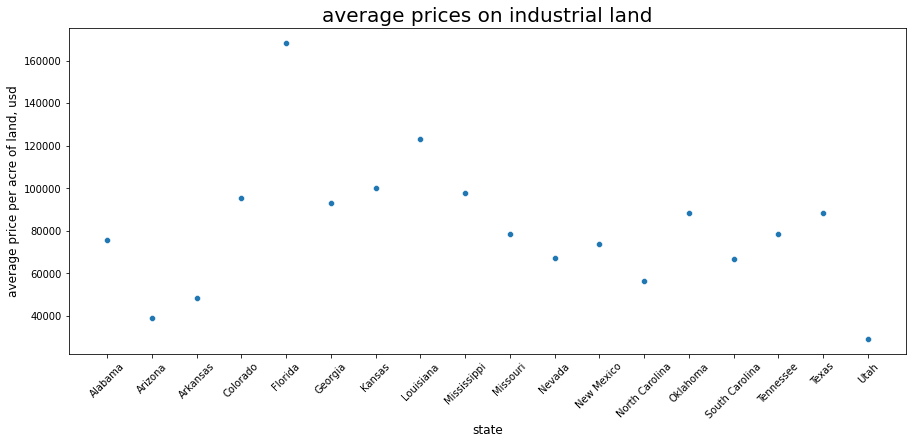

In [89]:
# plotting our data points to have more visual understanding of price levels

data = land_stats

fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(ax = ax, x = 'state', y = 'price per acre, usd', data = data)
ax.set_xlabel("state", size = 12)
ax.set_ylabel('average price per acre of land, usd', size = 12)
ax.set_title('average prices on industrial land', size = 20)
print(data.columns)
ax.set_xticklabels(data.index, rotation = 45)
plt.show()